In [70]:
%load_ext autoreload
%autoreload 2
import unyt as u
import numpy as np
import matplotlib.pyplot as plt

import richio
import _nb, dev

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
## Load data
fname = '/home/hey4/rich_tde/data/processed/ShockTubeIdealGasGamma1.001/shocktube_tests.hdf5'
gamma = dev.parse_gamma(fname)

print(gamma)

rho2_to_rho1 = u.unyt_array.from_hdf5(fname, dataset_name="rho2/rho1")
diss_rich = u.unyt_array.from_hdf5(fname, dataset_name="rich_dissipation")
diss_schaal = u.unyt_array.from_hdf5(fname, dataset_name="schaal_dissipation")
diss_dupdv = u.unyt_array.from_hdf5(fname, dataset_name="dupdv_dissipation")
diss_ie = u.unyt_array.from_hdf5(fname, dataset_name="internal_energy_jump")
M = u.unyt_array.from_hdf5(fname, dataset_name="mach number")

1.001


In [90]:
## The analytical curve of the area ratio
rho1 = 1
P1 = 1

R_max = (gamma + 1) / (gamma - 1)
# M_space = np.linspace(1.01, 500, 200)
# R_space = dev.M2R(M_space, gamma=gamma)
R_space = np.linspace(1.01, (1-1e-5)*R_max, 200)
M_space = dev.R2M(R_space, gamma=gamma)

A_poisson = []
A_hugoniot = []

for R in R_space:
    rho2 = R * rho1
    P2 = dev.P_hugoniot(rho2, P_ref=P1, rho_ref=rho1, gamma=gamma)

    v1 = 1.0 / rho1
    v2 = 1.0 / rho2

    # Use a linear spacing for specific volume v
    v_axis = np.linspace(v2, v1, 3000) 
    
    # Calculate pressures along the v_axis
    P_R = P1 + (P2 - P1) * (v_axis - v1) / (v2 - v1)
    P_H = dev.P_hugoniot(1.0 / v_axis, P_ref=P2, rho_ref=rho2, gamma=gamma)
    P_A = dev.P_poisson(1.0 / v_axis, P_ref=P1, rho_ref=rho1, gamma=gamma)

    # Area 1: The "Lens" between Rayleigh and Hugoniot
    A_h = np.trapezoid(P_R - P_H, v_axis)

    # Area 2: The difference between Rayleigh and Adiabat
    A_p = np.trapezoid(P_R - P_A, v_axis)

    A_poisson.append(A_p)
    A_hugoniot.append(A_h)

A_poisson = np.array(A_poisson)
A_hugoniot = np.array(A_hugoniot)
area_ratio = A_hugoniot / A_poisson

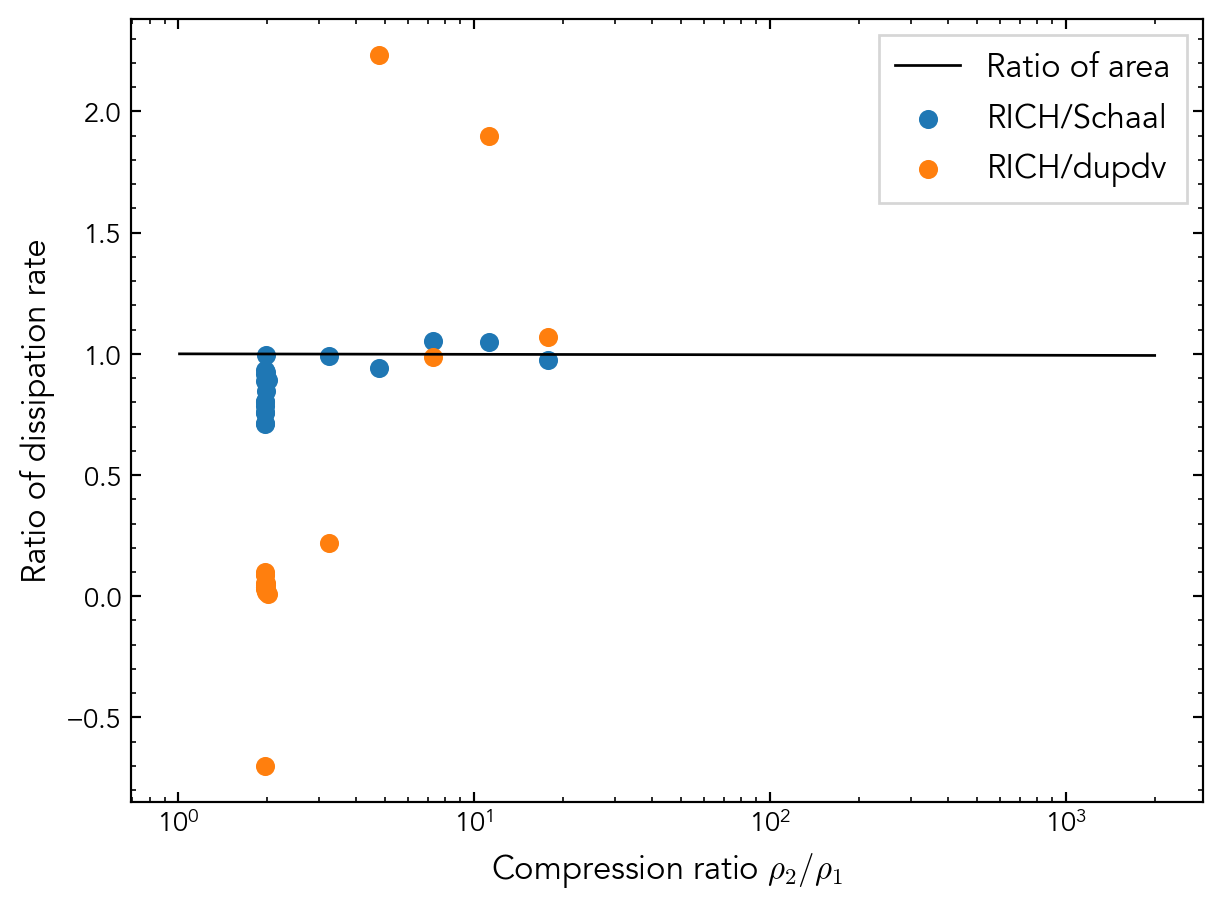

In [91]:
plt.figure()
plt.plot(R_space, area_ratio, color='k', label='Ratio of area')
plt.scatter(rho2_to_rho1, diss_rich/diss_schaal, label=r'RICH/Schaal')
plt.scatter(rho2_to_rho1, diss_rich/diss_dupdv, label=r'RICH/dupdv')

plt.xlabel(r"Compression ratio $\rho_2/\rho_1$")
plt.ylabel(r"Ratio of dissipation rate")

plt.xscale('log')
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig(f'../reports/figures/shocktubes/area-ratio-{gamma:.4g}-r.pdf')
plt.show()


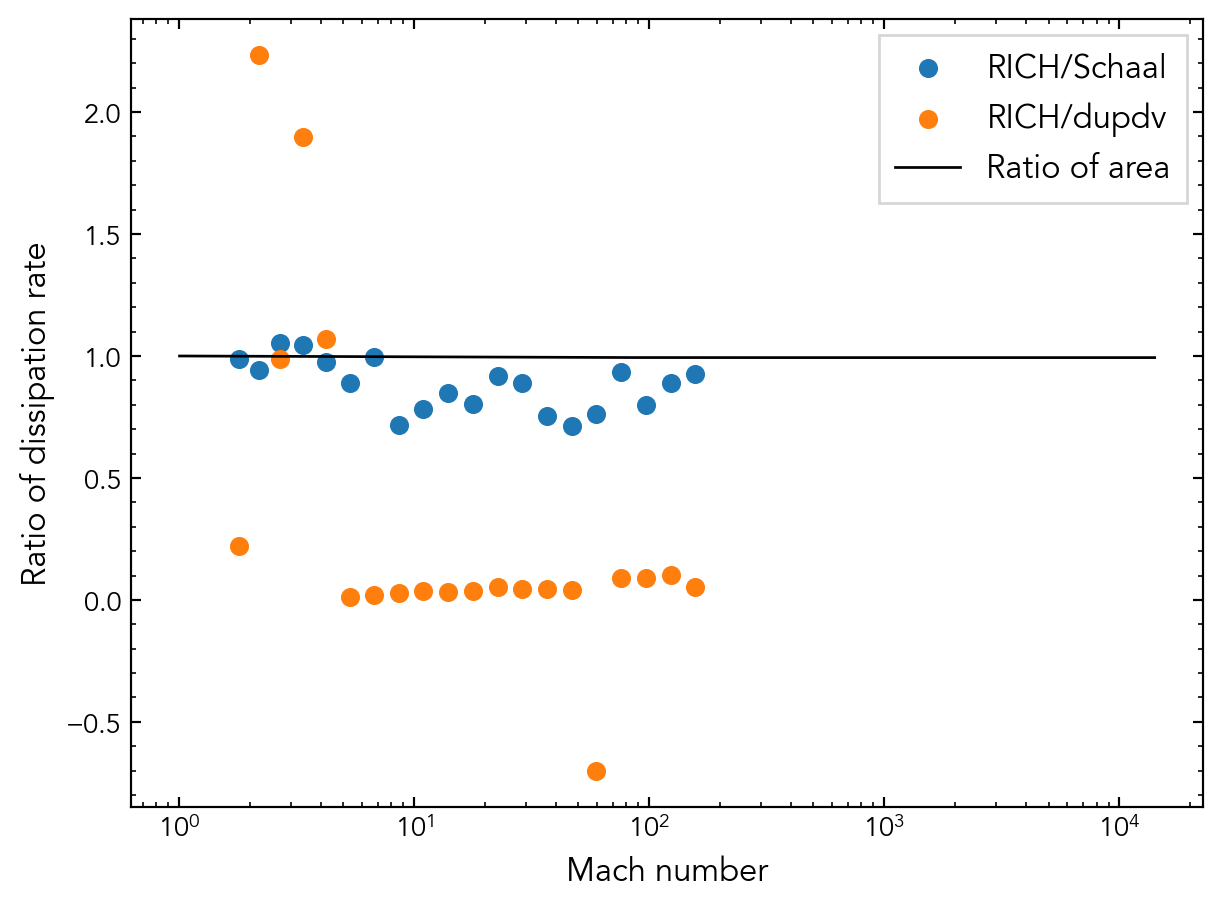

In [92]:
plt.figure()
plt.scatter(M, (diss_rich/diss_schaal), label=r'RICH/Schaal')
plt.scatter(M, diss_rich/diss_dupdv, label=r'RICH/dupdv')
plt.plot(M_space, area_ratio, color='k', label='Ratio of area')

plt.xlabel(r"Mach number")
plt.ylabel(r"Ratio of dissipation rate")

plt.xscale('log')
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig(f'../reports/figures/shocktubes/area-ratio-{gamma:.4g}-m.pdf')
plt.show()


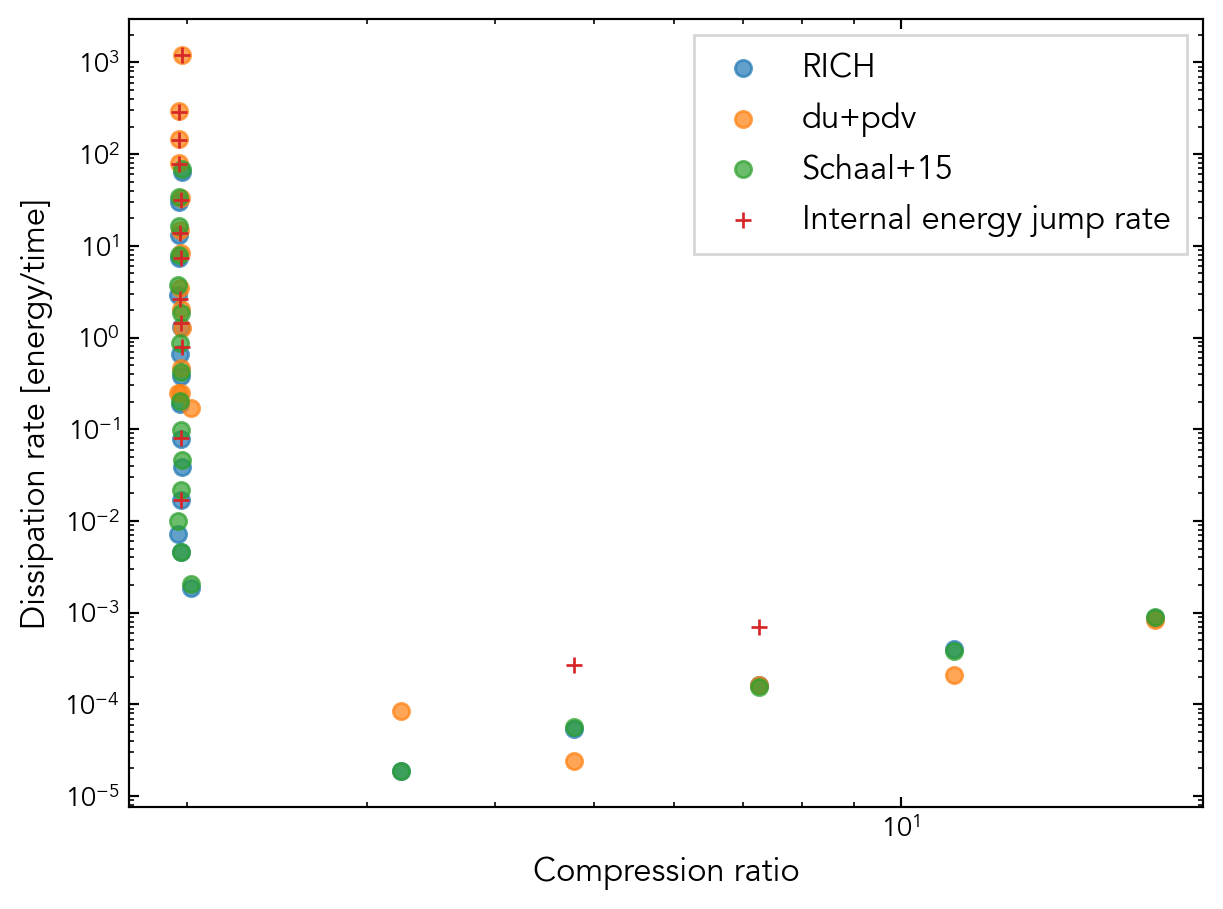

In [93]:
plt.figure()
plt.scatter(rho2_to_rho1, diss_rich, label='RICH', alpha=0.7)
plt.scatter(rho2_to_rho1, diss_dupdv, label='du+pdv', alpha=0.7)
plt.scatter(rho2_to_rho1, diss_schaal, label='Schaal+15', alpha=0.7)
plt.scatter(rho2_to_rho1, diss_ie, label='Internal energy jump rate', marker='+')

plt.xlabel('Compression ratio')
plt.ylabel('Dissipation rate [energy/time]')
plt.legend(frameon=True)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig(f'../reports/figures/shocktubes/diss-rate-compare-{gamma:.4g}-r.pdf')
plt.show()

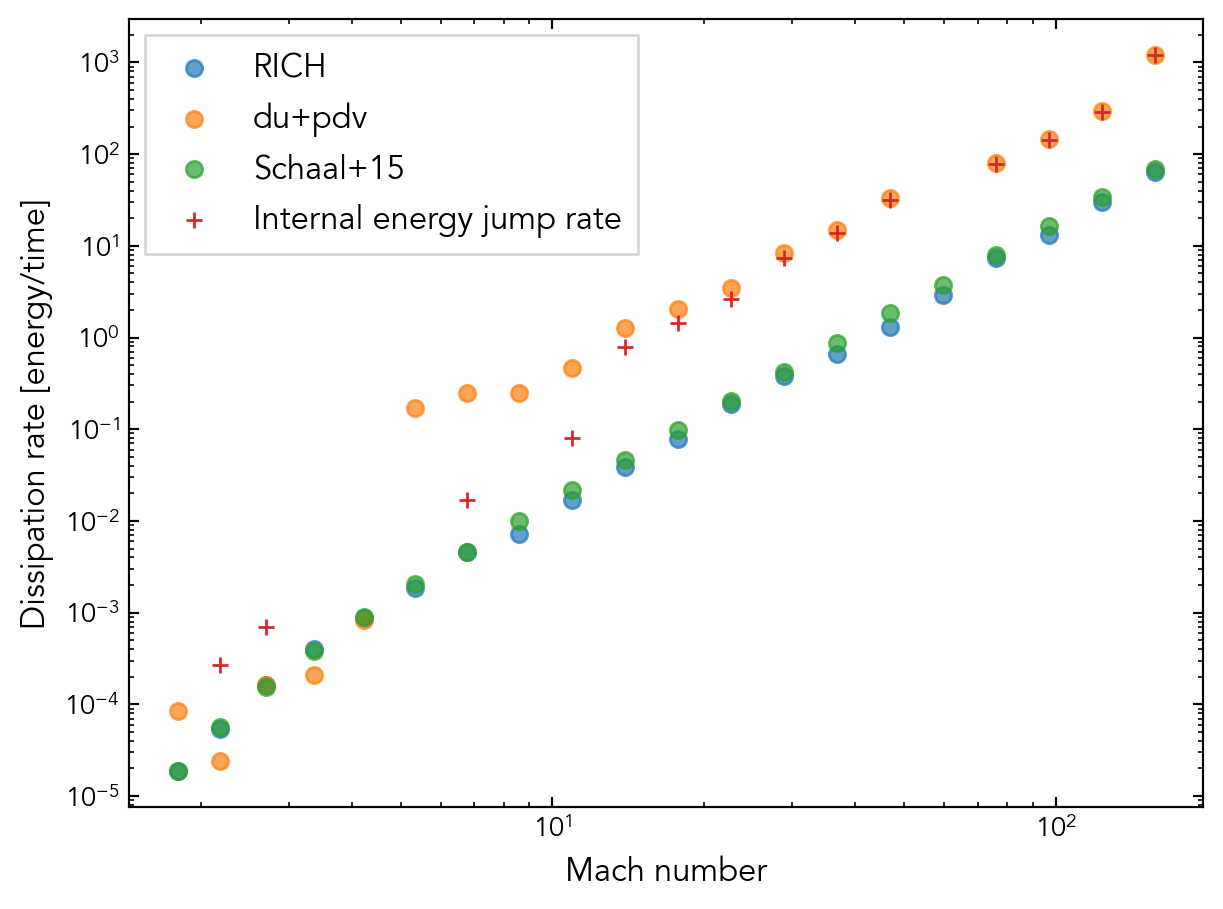

In [ ]:
plt.figure()
plt.scatter(M, diss_rich, label='RICH', alpha=0.7)
plt.scatter(M, diss_dupdv, label='du+pdv', alpha=0.7)
plt.scatter(M, diss_schaal, label='Schaal+15', alpha=0.7)
plt.scatter(M, diss_ie, label='Internal energy jump rate', marker='+')

plt.xlabel('Mach number')
plt.ylabel('Dissipation rate [energy/time]')
plt.legend(frameon=True)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
# plt.savefig(f'../reports/figures/shocktubes/diss-rate-compare-{gamma:.4g}-m.pdf')
plt.show()